In [1]:
import numpy as np
import pandas as pd
import os
import glob
import itertools
import scanpy as sc
import natsort
import json

from scroutines import basicu

import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from scroutines.config_plots import *

In [3]:
class Bigtensor():
    def __init__(self, bigtensor, meta):
        
        self.palette = {
            'NR': 'C1', 
            'DR': 'k',
            'DL': 'C2', 
        }

        self.anno_marker_dict = {
            'NR': 'o',
            'DR': 's',
            'DL': '^',
        }
        
        self.bigtensor = bigtensor
        self.nf, self.nr, self.nc, self.ng = meta['size']
        self.conds = np.array(meta['dim0'])
        self.reps  = np.array(meta['dim1'])
        self.types = np.array(meta['dim2'])
        self.genes = np.array(meta['dim3'])

        self.conds_time = np.array([int(cond[1:-2]) for cond in self.conds])
        self.conds_anno = np.array([cond[-2:] for cond in self.conds])
        self.conds_color = pd.Series(self.palette).loc[self.conds_anno].values 
        
        return
    
    def plot_one(self, ax, selected_type, selected_gene, annotate=True):
        """
        """
        type_idx = basicu.get_index_from_array(self.types, [selected_type])[0]
        gene_idx = basicu.get_index_from_array(self.genes, [selected_gene])[0]

        vals = self.bigtensor[:,:,type_idx, gene_idx] # cond by rep
        vals_mean = np.nanmean(vals, axis=1)


        ax.set_title(f'{selected_gene} in {selected_type}')
        for anno in ['NR', 'DR', 'DL']:
            marker = self.anno_marker_dict[anno]
            sel = self.conds_anno == anno
            if sel.sum() > 0:
                
                if anno == 'NR':
                    ax.set_xticks(self.conds_time[sel])
                    ax.plot(self.conds_time[sel], vals_mean[sel], '-k')

                ax.scatter(np.repeat(self.conds_time[sel], self.nr), vals[sel].reshape(-1,), 
                           color='k',
                           facecolors='none',
                           marker=marker,
                           label=anno,
                          )

        sns.despine(ax=ax)
        ax.grid(axis='x')

        if annotate:
            handles, labels = ax.get_legend_handles_labels()
            unique_labels = dict(zip(labels, handles))
            ax.legend(unique_labels.values(), unique_labels.keys(), fontsize=12) # , bbox_to_anchor=(1,1))

            ax.set_xlabel('Postnatal day (P)')
            ax.set_ylabel('log2(CPM+1)')
        
    def plot_one_simple(self, ax, selected_type, selected_gene, annotate=True, color='k'):
        """
        """
        type_idx = basicu.get_index_from_array(self.types, [selected_type])[0]
        gene_idx = basicu.get_index_from_array(self.genes, [selected_gene])[0]

        vals = self.bigtensor[:,:,type_idx, gene_idx] # cond by rep
        vals_mean = np.nanmean(vals, axis=1)


        ax.set_title(f'{selected_gene} in {selected_type}')
        for anno in ['NR', 'DR', 'DL']:
            marker = self.anno_marker_dict[anno]
            sel = self.conds_anno == anno
            if sel.sum() > 0:
                
                if anno == 'NR':
                    ax.plot(self.conds_time[sel], vals_mean[sel], '-', color=color)

                ax.scatter(np.repeat(self.conds_time[sel], self.nr), vals[sel].reshape(-1,), 
                           color=color,
                           facecolors='none',
                           marker=marker,
                           label=anno,
                          )

        sns.despine(ax=ax)

        if annotate:
            handles, labels = ax.get_legend_handles_labels()
            unique_labels = dict(zip(labels, handles))
            ax.legend(unique_labels.values(), unique_labels.keys(), fontsize=12) # , bbox_to_anchor=(1,1))

            ax.set_xlabel('Postnatal day (P)')
            ax.set_ylabel('log2(CPM+1)')
        

In [4]:
f_data = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/cheng21_cell_scrna/res/bigtensor_subclass.npy' 
f_meta = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/cheng21_cell_scrna/res/bigtensor_subclass.json' 

bigtensor = np.load(f_data)
with open(f_meta, 'r') as fp:
    meta = json.load(fp)

bo0 = Bigtensor(bigtensor, meta)
print(bigtensor.shape)

(9, 2, 20, 53801)


In [5]:
f_data = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/v1_multiome/res/bigtensor_subclass.npy' 
f_meta = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/v1_multiome/res/bigtensor_subclass.json' 

bigtensor = np.load(f_data)
with open(f_meta, 'r') as fp:
    meta = json.load(fp)

bo1 = Bigtensor(bigtensor, meta)
print(bigtensor.shape)

(11, 3, 18, 20124)


# plot

In [6]:
def plot_combined(bo0, bo1, gene, type0, type1):
    xticks = [6,10,14,17,21,28,38]
    
    fig, axs = plt.subplots(1,2,figsize=(2*5,1*4), sharex=True, sharey=True)
    ax = axs[0]
    bo0.plot_one_simple(ax, type0, gene, color='k')
    bo1.plot_one_simple(ax, type0, gene, annotate=False, color='C1')
    ax.set_xticks(xticks)
    ax.grid(axis='x')

    ax = axs[1]
    bo0.plot_one_simple(ax, type1, gene, annotate=False, color='k')
    bo1.plot_one_simple(ax, type1, gene, annotate=False, color='C1')
    ax.set_xticks(xticks)
    ax.grid(axis='x')
    plt.show()

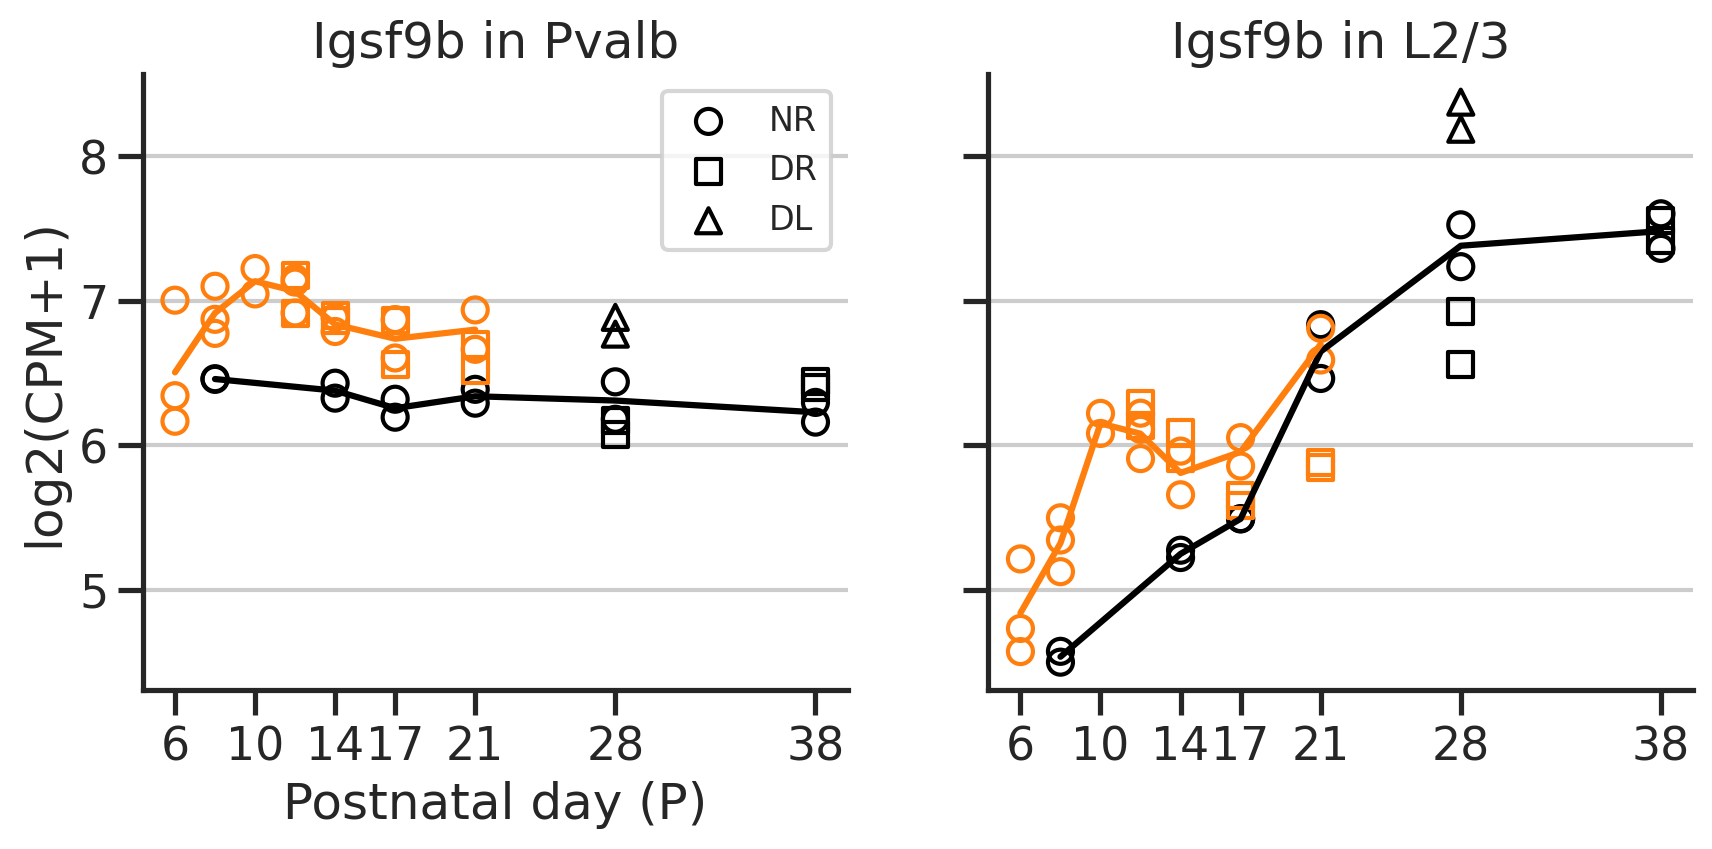

In [7]:
plot_combined(bo0, bo1, 'Igsf9b', 'Pvalb', 'L2/3')

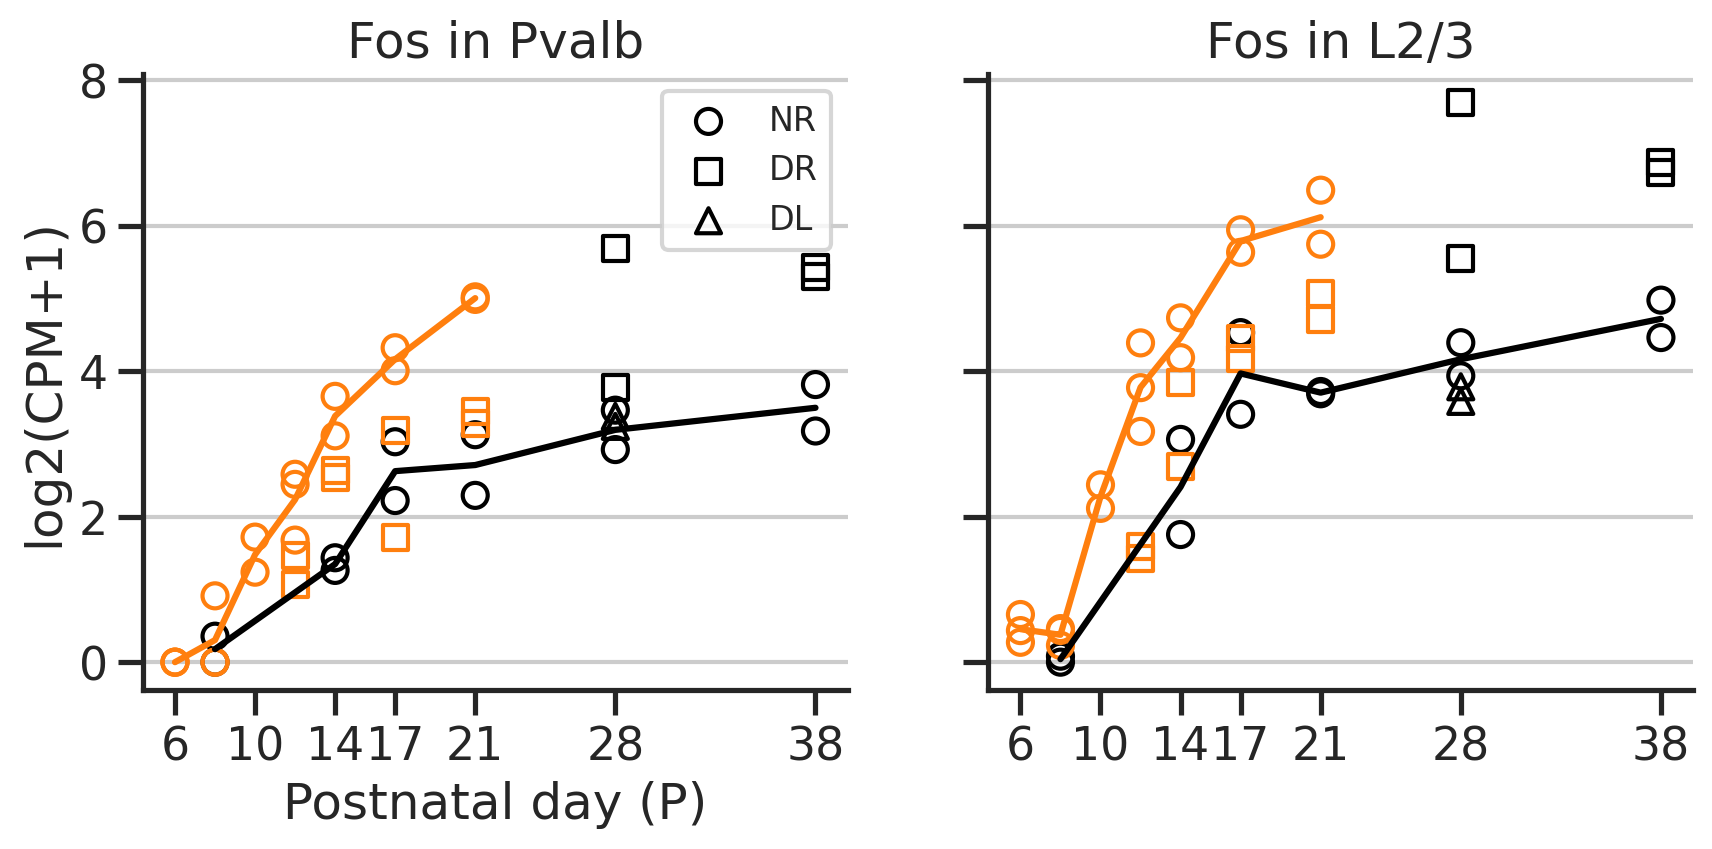

In [8]:
plot_combined(bo0, bo1, 'Fos', 'Pvalb', 'L2/3')

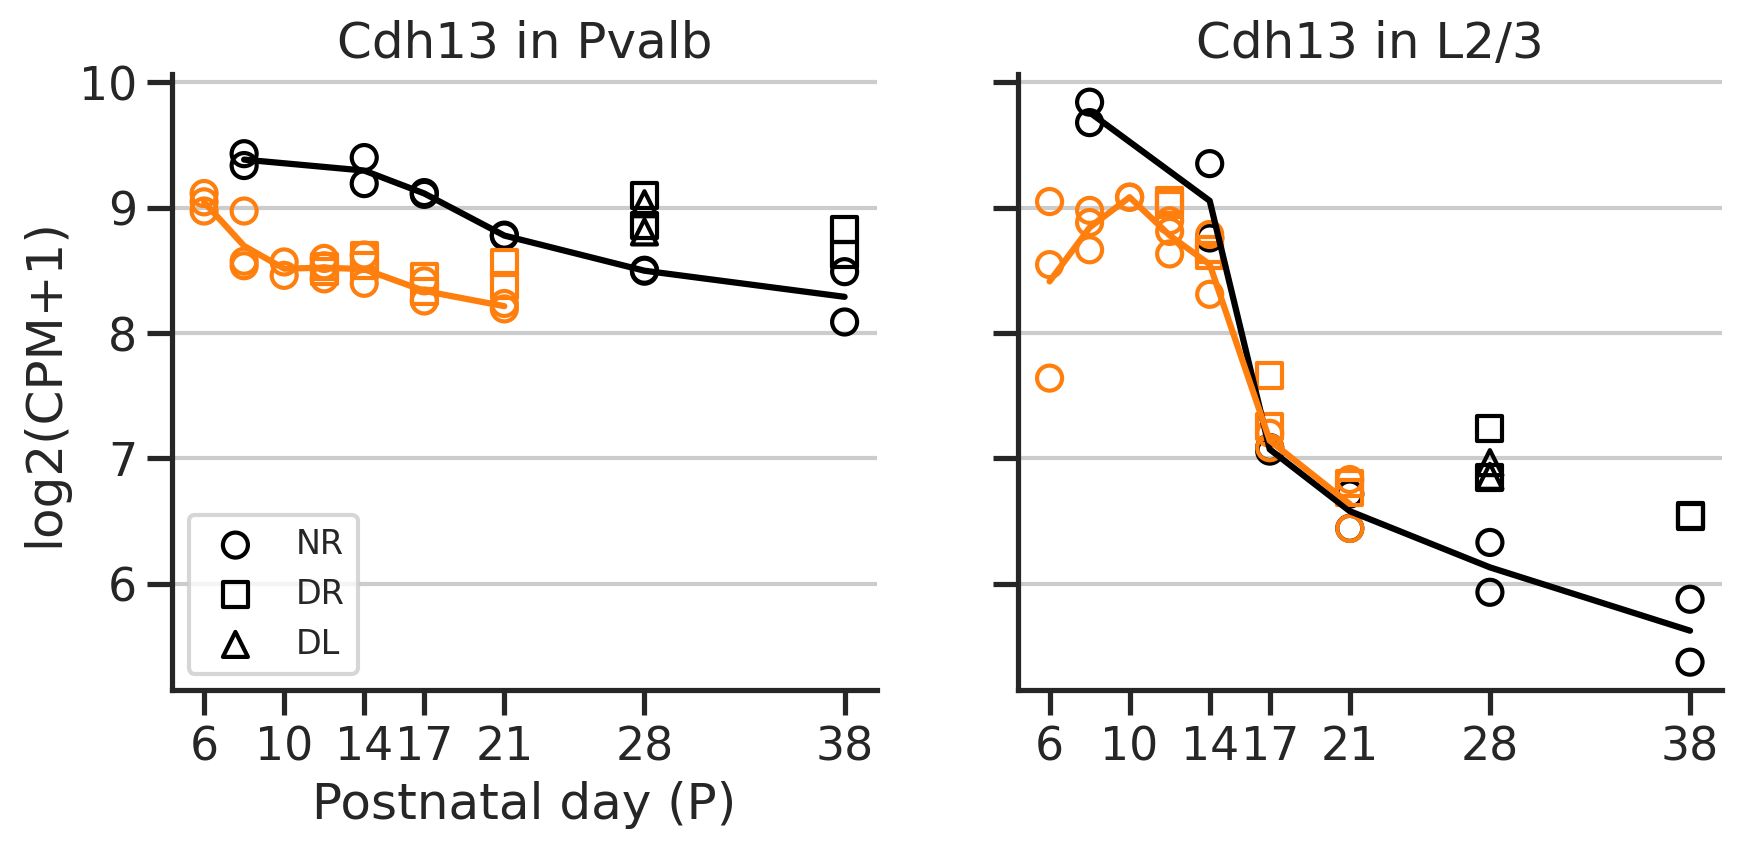

In [9]:
plot_combined(bo0, bo1, 'Cdh13', 'Pvalb', 'L2/3')

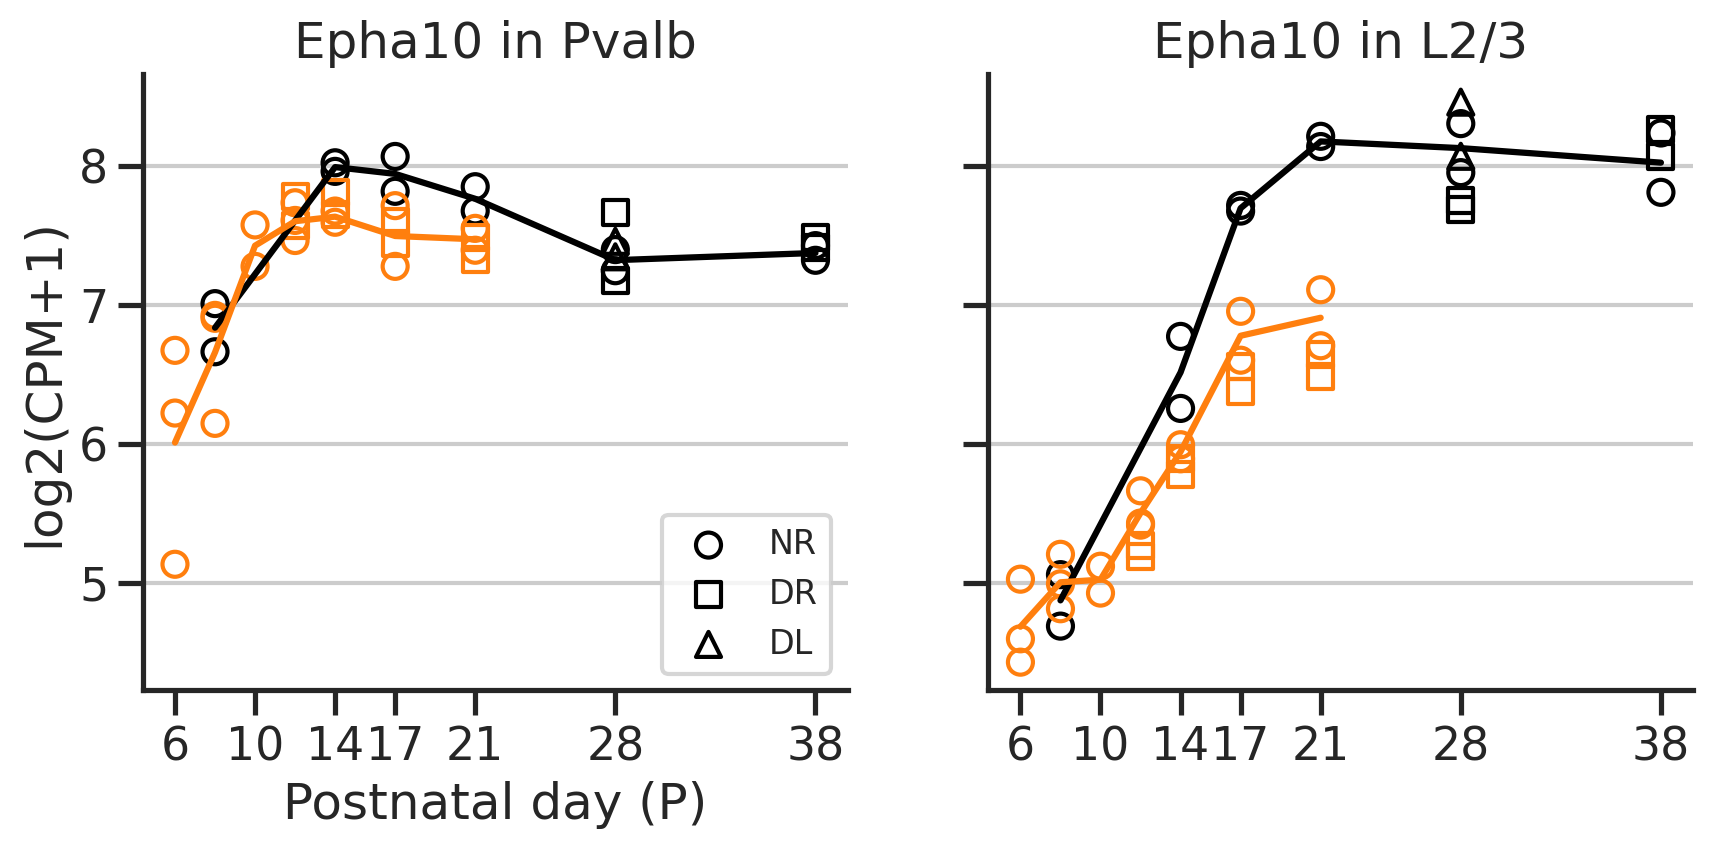

In [10]:
plot_combined(bo0, bo1, 'Epha10', 'Pvalb', 'L2/3')

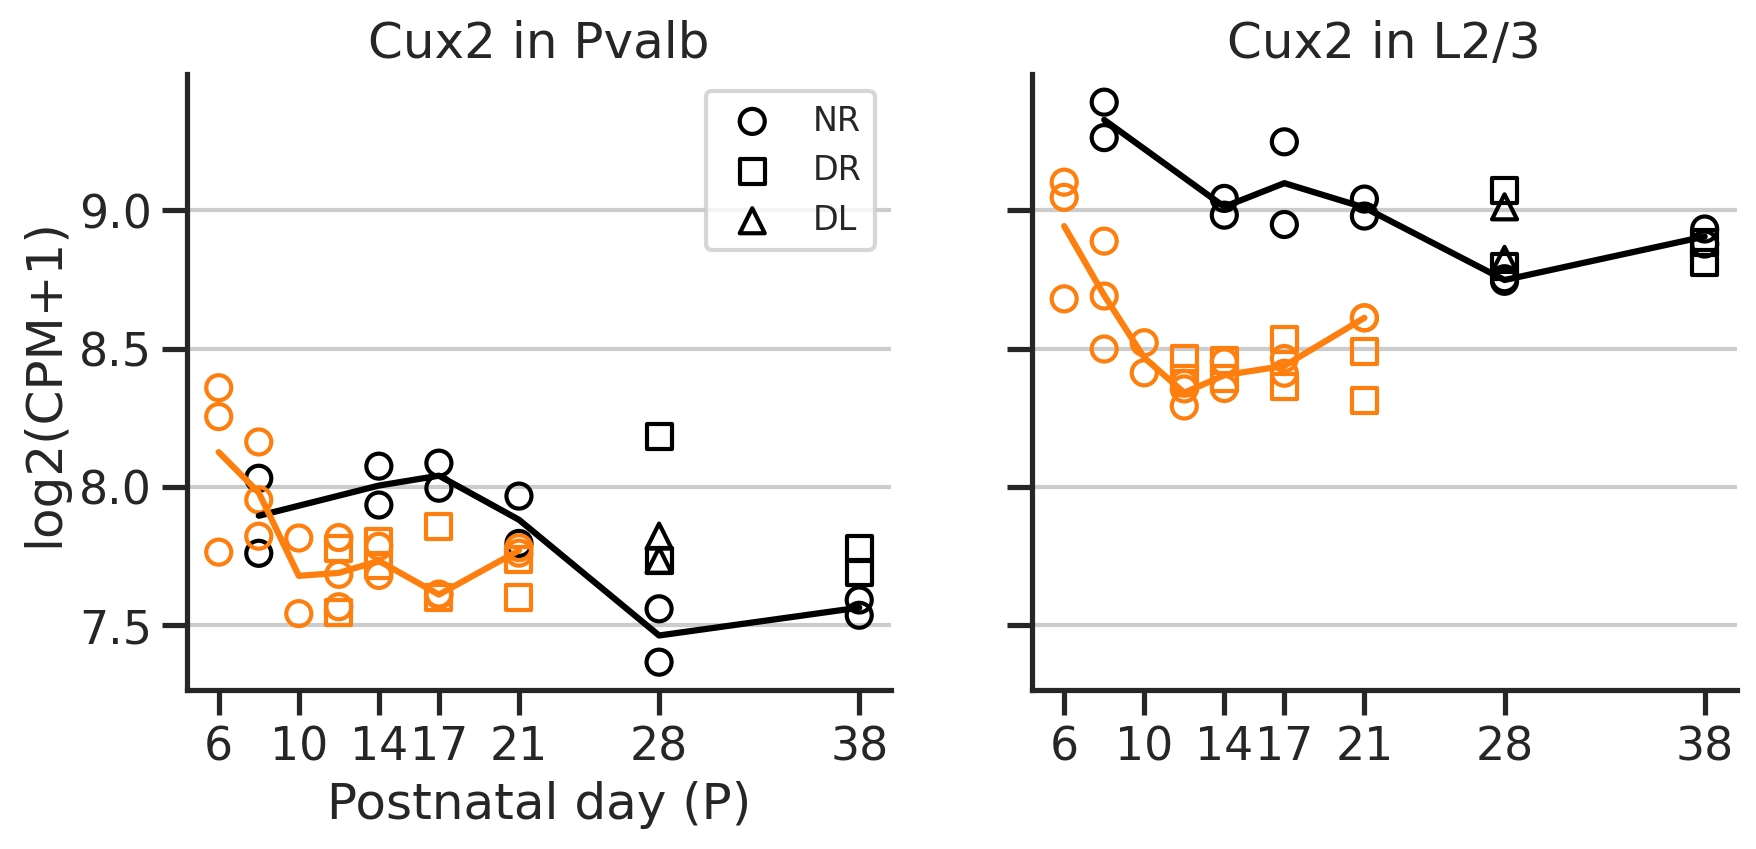

In [11]:
plot_combined(bo0, bo1, 'Cux2', 'Pvalb', 'L2/3')

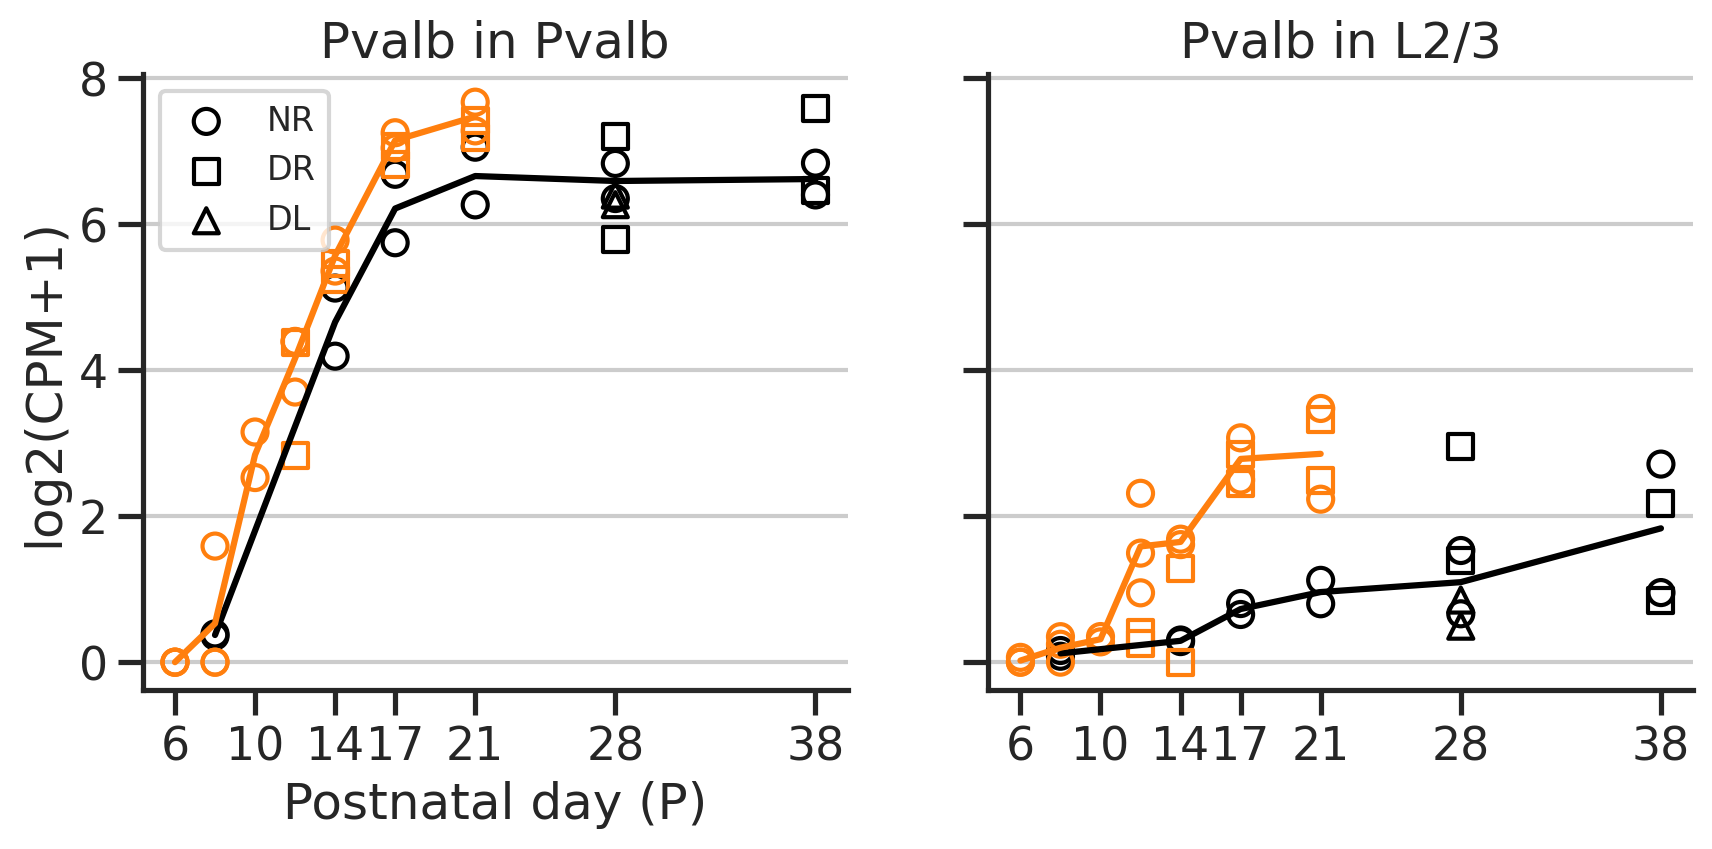

In [12]:
plot_combined(bo0, bo1, 'Pvalb', 'Pvalb', 'L2/3')

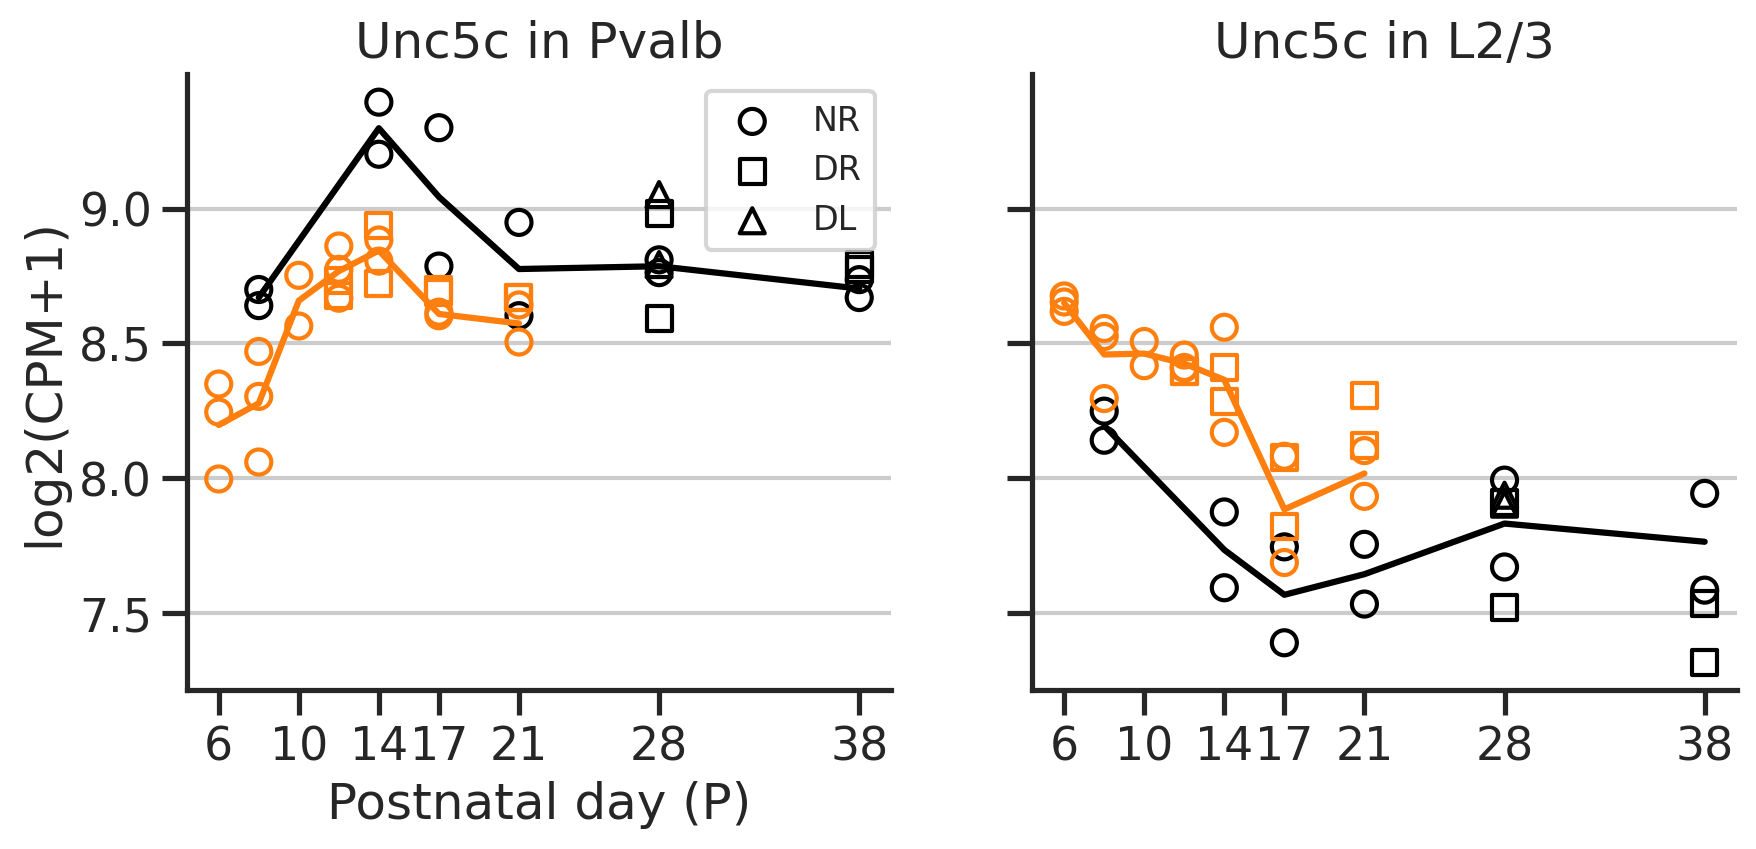

In [13]:
plot_combined(bo0, bo1, 'Unc5c', 'Pvalb', 'L2/3')